---
title: Deep Learning and Machine Learning <code>project-1</code>
descrption: Deep Learning and Machine Learning Project-1
author: Poornima Bhatia
date: 'January 21, 2025'
categories: ['Handwritten Digit Recognition' , 'CNN']
image: False
foramt:
html:
code-fold: true
---

## Handwritten Digits Recognition (using Convolutional Neural Network)


# import dependenices
- pytorch - for developing and training ML models.
- matplotlib - for plotting the data.
- seaborn - for plotting confusion matrix.
- numpy - for linear algebra operations.
- pandas - for displaying training/test data in a table.
- math - for calculating square roots etc.
- datetime - for generating a logs folder names.

In [1]:
import torch
print("PyTorch Version: " , torch.__version__)

PyTorch Version:  2.6.0+cu124


In [2]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
%pip install torchviz graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [4]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
from sklearn.metrics import confusion_matrix
from torchviz import make_dot

print("Python Version: " , platform.python_version())

Python Version:  3.11.11


## Load the data
- The training dataset consists of 60000 28x28px images of handwritten digits from 0 to 9.
-The test dataset consists of 10000 28x28px images.

In [5]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor()])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Convert datasets to tensors
x_train = torch.tensor(train_dataset.data, dtype=torch.float32)  # Shape: (60000, 28, 28)
y_train = torch.tensor(train_dataset.targets, dtype=torch.long)  # Shape: (60000,)
x_test = torch.tensor(test_dataset.data, dtype=torch.float32)    # Shape: (10000, 28, 28)
y_test = torch.tensor(test_dataset.targets, dtype=torch.long)    # Shape: (10000,)

# Normalize x_train and x_test (since TensorFlow automatically scales between 0-1)
x_train /= 255.0
x_test /= 255.0

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.01MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.91MB/s]
<ipython-input-5-ecea156f48d2>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(train_dataset.data, dtype=torch.float32)  # Shape: (60000, 28, 28)
<ipython-input-5-ecea156f48d2>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(train_dataset.targets, dtype=torch.long)  # Shape: (60000,)
<ipython-input-5-ecea156f48d2>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTenso

In [6]:
print("Number of training examples: " , len(train_dataset))
print("Number of test examples: " , len(test_dataset))
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

Number of training examples:  60000
Number of test examples:  10000
x_train:  torch.Size([60000, 28, 28])
y_train:  torch.Size([60000])
x_test:  torch.Size([10000, 28, 28])
y_test:  torch.Size([10000])


In [7]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, image_width, image_height) = x_train.shape
image_channels = 1
print('image_width:', image_width);
print('image_height:', image_height);
print('image_channels:', image_channels);

image_width: 28
image_height: 28
image_channels: 1


## Explore the data
Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from 0 to 255). Each integer represents a color of a pixel.

In [8]:
pd.DataFrame(x_train[0].numpy())

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.686275,0.101961,0.650980,1.000000,0.968627,0.498039,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.117647,0.141176,...,0.882353,0.674510,0.992157,0.949020,0.764706,0.250980,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.192157,0.933333,0.992157,...,0.364706,0.321569,0.321569,0.219608,0.152941,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.070588,0.858824,0.992157,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.313726,0.611765,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


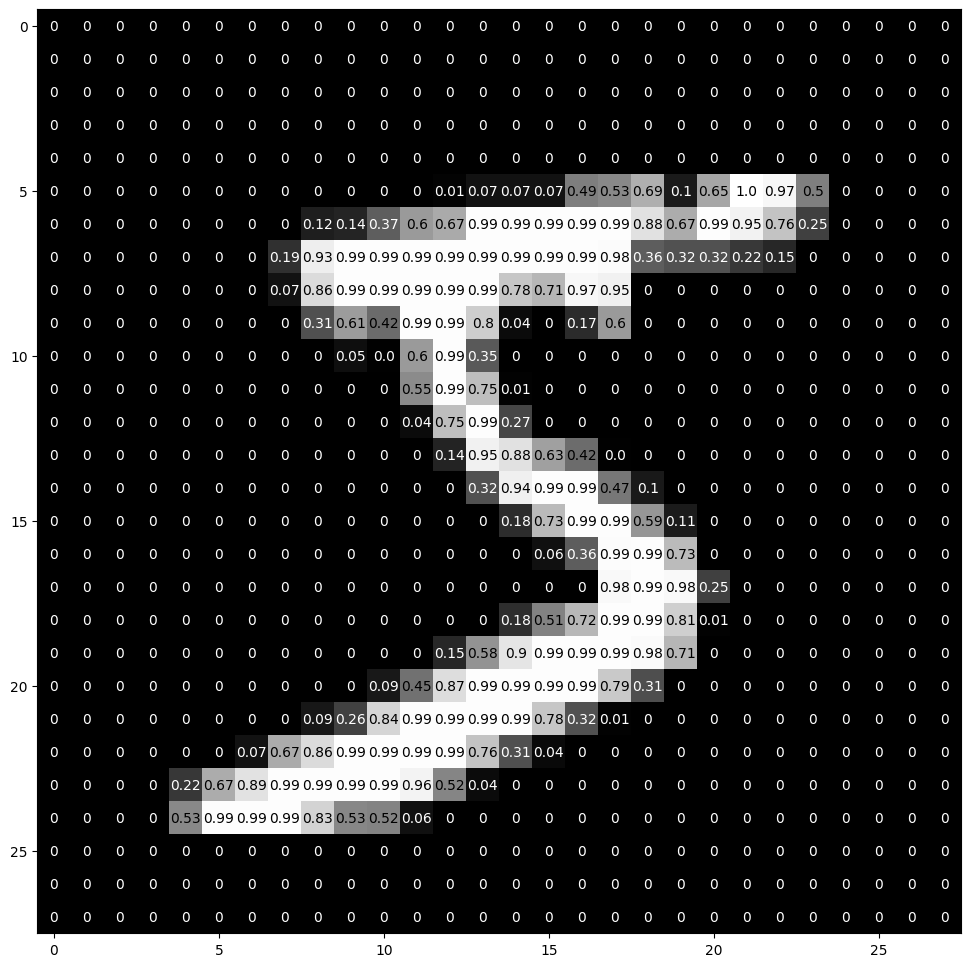

In [9]:
img = np.squeeze(x_train[0].numpy())

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

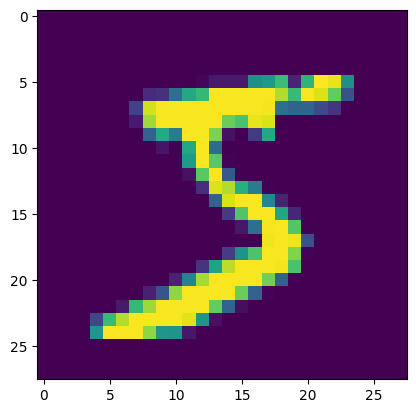

In [10]:
# this matrix of numbers may be drawn as follow:
plt.imshow(x_train[0])
plt.show()

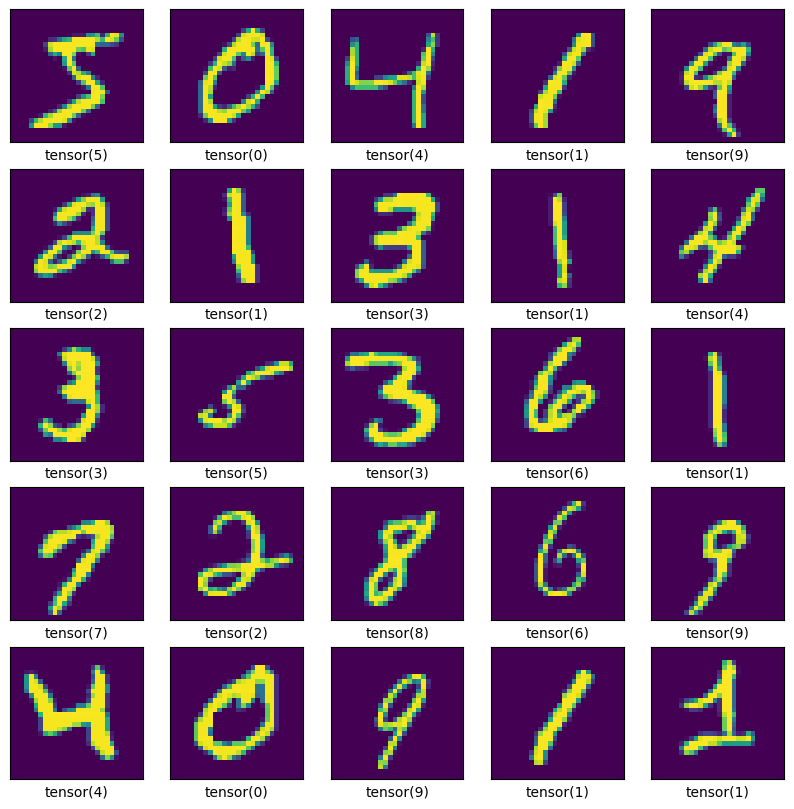

In [11]:
nums_of_display = 25
num_cells = math.ceil(math.sqrt(nums_of_display))
plt.figure(figsize=(10,10))
for i in range(nums_of_display):
    plt.subplot(num_cells, num_cells, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
plt.show()

## Reshaping the data
In order to use convolution layers we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of (28, 28) which means that it is a 28x28 matrix of color values form 0 to 255. We need to reshape it to (28, 28, 1) shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [12]:
x_train_with_channels = x_train.float().reshape(
    x_train.shape[0],
    image_width,
    image_height,
    image_channels
)

print("x_train_with_chanels: ", x_train_with_channels.shape)

x_test_with_channels = x_test.float().reshape(
    x_test.shape[0],
    image_width,
    image_height,
    image_channels
)

print("x_test_with_channels: ", x_test_with_channels.shape)

x_train_with_chanels:  torch.Size([60000, 28, 28, 1])
x_test_with_channels:  torch.Size([10000, 28, 28, 1])


## Normalize the data
Here we're just trying to move from values range of [0...255] to [0...1].

In [13]:
# x_train_normalized = x_train_with_channels / 255.0
# x_test_normalized = x_test_with_channels / 255.0

x_train_normalized = x_train_with_channels
x_test_normalized = x_test_with_channels
print("normalization range: ", x_train_normalized.min().item(), x_train_normalized.max().item())

normalization range:  0.0 1.0


In [14]:
import torch.nn as nn
import torch.nn.functional as F

In [15]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Convolution Layer 1
        self.conv1 = nn.Conv2d(in_channels=image_channels, out_channels=8, kernel_size=5, stride=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling

        # Convolution Layer 2
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, stride=1)

        # Fully Connected Layers
        self.fc1 = nn.Linear(16 * ((image_width // 4) - 3) * ((image_height // 4) - 3), 128)  # Flattened size
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 10)  # Output layer (10 classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Conv1 + ReLU
        x = self.pool(x)           # MaxPooling1

        x = F.relu(self.conv2(x))  # Conv2 + ReLU
        x = self.pool(x)           # MaxPooling2

        x = torch.flatten(x, start_dim=1)  # Flatten
        x = F.relu(self.fc1(x))  # Fully Connected Layer
        x = self.dropout(x)      # Dropout Layer
        x = F.log_softmax(self.fc2(x), dim=1)  # Softmax activation for 10 classes

        return x

# Create model instance
model = CNNModel()
print(model)  # Display the model architecture

CNNModel(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [16]:
def count_parameters(model):
    total_params = sum(p.numel() for p in model.parameters())  # Total parameters
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)  # Trainable parameters
    non_trainable_params = total_params - trainable_params  # Non-trainable parameters

    print(f"Total Parameters: {total_params}")
    print(f"Trainable Parameters: {trainable_params}")
    print(f"Non-Trainable Parameters: {non_trainable_params}")

# Create model instance and count parameters
model = CNNModel()
count_parameters(model)

Total Parameters: 37610
Trainable Parameters: 37610
Non-Trainable Parameters: 0


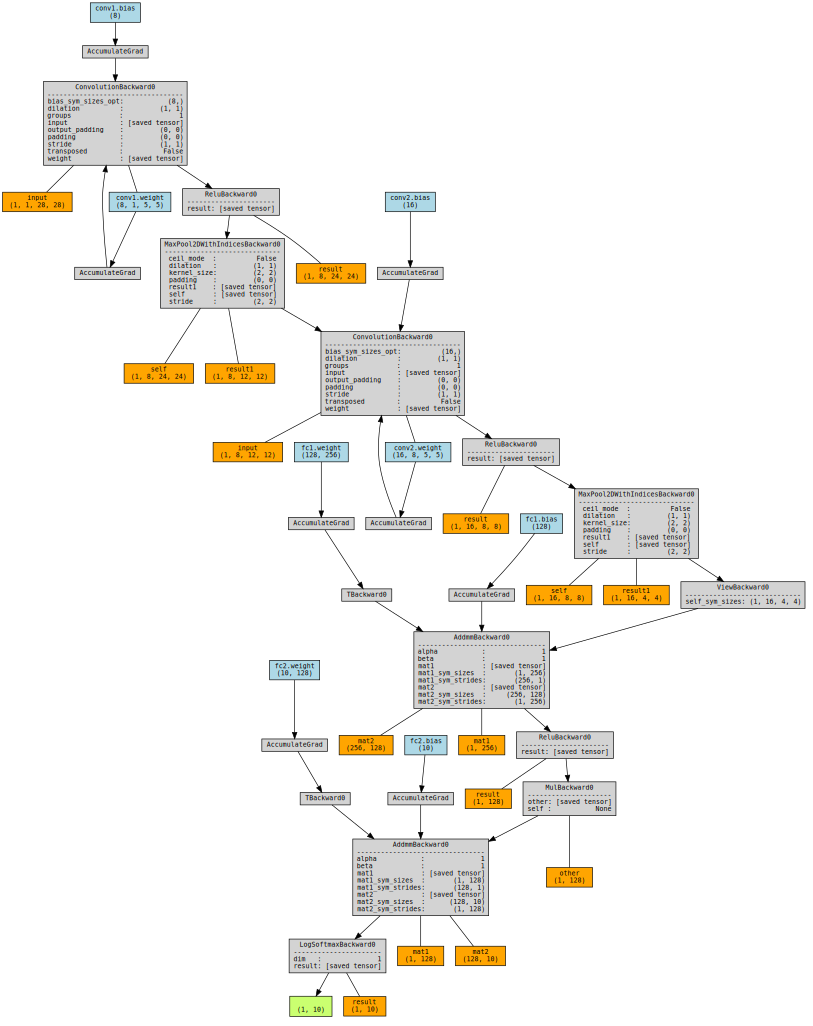

In [17]:
# Generate a sample input tensor
input_tensor = torch.randn(1, 1, 28, 28)

# Forward pass through the model
output = model(input_tensor)

# Generate the computation graph
graph = make_dot(output, params=dict(model.named_parameters()) , show_attrs=True, show_saved=True)

# Render and display the graph
graph.render("cnn_model_graph", format="png")  # Saves as a PNG file
graph  # Display


Epoch 1/10, Train Loss: 0.2793, Train Accuracy: 91.38%, Test Loss: 0.0708, Test Accuracy: 97.73%
Epoch 2/10, Train Loss: 0.0846, Train Accuracy: 97.37%, Test Loss: 0.0546, Test Accuracy: 98.26%
Epoch 3/10, Train Loss: 0.0668, Train Accuracy: 97.91%, Test Loss: 0.0416, Test Accuracy: 98.65%
Epoch 4/10, Train Loss: 0.0545, Train Accuracy: 98.30%, Test Loss: 0.0384, Test Accuracy: 98.81%
Epoch 5/10, Train Loss: 0.0464, Train Accuracy: 98.54%, Test Loss: 0.0345, Test Accuracy: 98.82%
Epoch 6/10, Train Loss: 0.0412, Train Accuracy: 98.69%, Test Loss: 0.0352, Test Accuracy: 98.83%
Epoch 7/10, Train Loss: 0.0349, Train Accuracy: 98.87%, Test Loss: 0.0300, Test Accuracy: 99.01%
Epoch 8/10, Train Loss: 0.0325, Train Accuracy: 98.94%, Test Loss: 0.0324, Test Accuracy: 99.04%
Epoch 9/10, Train Loss: 0.0289, Train Accuracy: 99.05%, Test Loss: 0.0364, Test Accuracy: 98.84%
Epoch 10/10, Train Loss: 0.0262, Train Accuracy: 99.14%, Test Loss: 0.0299, Test Accuracy: 99.14%


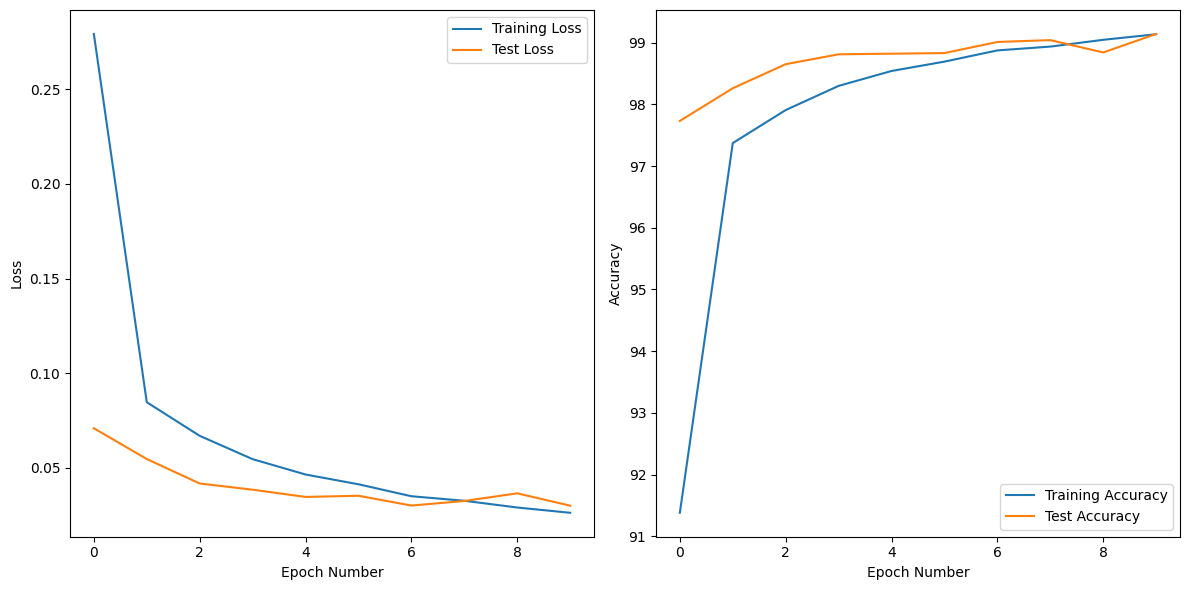

In [18]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Create TensorDataset for train and test data
train_dataset = TensorDataset(x_train_with_channels, y_train)
test_dataset = TensorDataset(x_test_with_channels, y_test)

# Create DataLoader objects for batching
batch_size = 64  # You can adjust the batch size as needed

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Tracking history
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
epochs = 10

# Training loop
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.permute(0,3,1,2))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation phase
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs.permute(0,3,1,2))
            loss = criterion(outputs, labels)

            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss = running_loss / len(test_loader)
    test_accuracy = 100 * correct / total
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    # Print the progress
    print(f'Epoch {epoch+1}/{10}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
          f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

# Plotting training and test loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()

# Plotting training and test accuracy
plt.subplot(1, 2, 2)
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
# Convert the data into PyTorch tensors (assuming you already have x_train, y_train, x_test, and y_test)
x_train_tensor = torch.tensor(x_train_with_channels, dtype=torch.float32)  # Shape: (60000, 1, 28, 28)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Shape: (60000,)
x_test_tensor = torch.tensor(x_test_with_channels, dtype=torch.float32)  # Shape: (10000, 1, 28, 28)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)  # Shape: (10000,)

# Final evaluation on the train set
model.eval()
with torch.no_grad():
    # Evaluation on the training set
    train_outputs = model(x_train_tensor.permute(0,3,1,2))  # Assuming input shape is [batch_size, channels, height, width]
    _, train_predictions = torch.max(train_outputs, 1)  # Get the predicted class
    train_loss = criterion(train_outputs, y_train_tensor).item()  # Compute loss
    train_accuracy = 100 * (train_predictions == y_train_tensor).sum().item() / len(y_train_tensor)  # Compute accuracy

    print(f'Training Loss: {train_loss:.4f}')
    print(f'Training Accuracy: {train_accuracy:.2f}%')

    # Evaluation on the test set
    test_outputs = model(x_test_tensor.permute(0,3,1,2))  # Test set evaluation
    _, test_predictions = torch.max(test_outputs, 1)  # Get the predicted class
    test_loss = criterion(test_outputs, y_test_tensor).item()  # Compute loss
    test_accuracy = 100 * (test_predictions == y_test_tensor).sum().item() / len(y_test_tensor)  # Compute accuracy

    print(f'Validation Loss: {test_loss:.4f}')
    print(f'Validation Accuracy: {test_accuracy:.2f}%')

<ipython-input-19-f718d33e2e61>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train_tensor = torch.tensor(x_train_with_channels, dtype=torch.float32)  # Shape: (60000, 1, 28, 28)
<ipython-input-19-f718d33e2e61>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Shape: (60000,)
<ipython-input-19-f718d33e2e61>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test_tensor = torch.tensor(x_test_with_channels, dtype=torch.float32)  # Shape: (10000, 1, 28, 28)
<ipython-input-19-f71

Training Loss: 0.0129
Training Accuracy: 99.61%
Validation Loss: 0.0301
Validation Accuracy: 99.14%


In [20]:
model_name = 'handwritten_digits_recognition_using_cnn'
torch.save(model.state_dict(), f'{model_name}.pth')
print("Model saved successfully.")
# Load the model state dict from the file
model.load_state_dict(torch.load(f'{model_name}.pth'))

Model saved successfully.


<All keys matched successfully>

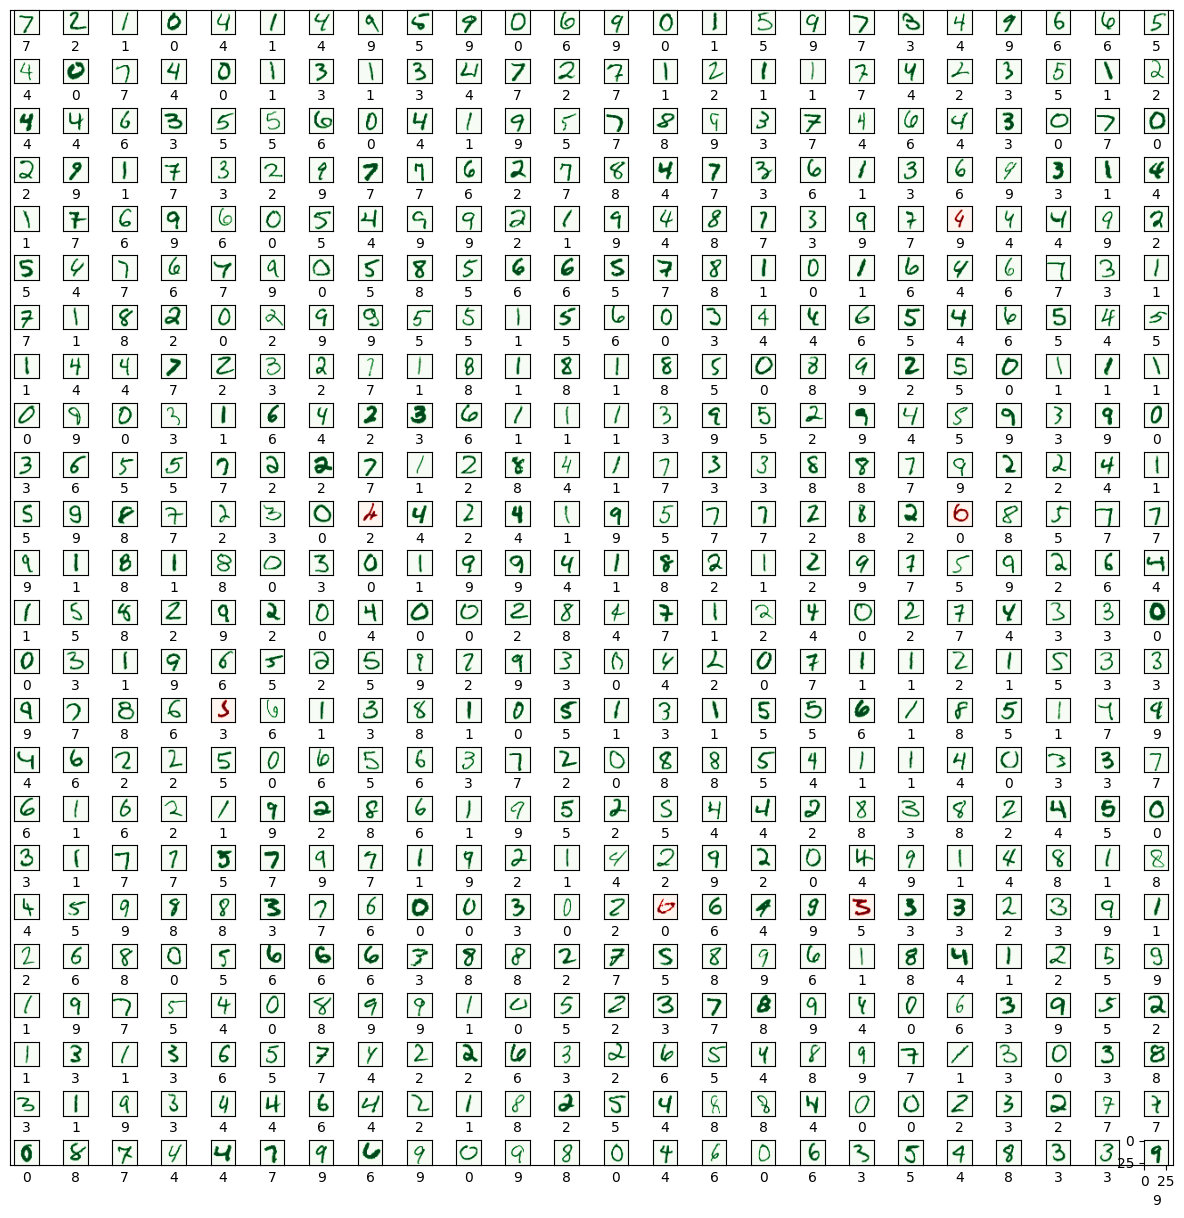

In [21]:
# Set model to evaluation mode
model.eval()

# Get predictions from the model (output of the forward pass)
with torch.no_grad():
    # Passing the test images through the model
    outputs = model(x_test_normalized.permute(0, 3, 1, 2))  # Adding the channel dimension (if needed)

    # Get the predicted labels from the output
    _, predictions = torch.max(outputs, 1)  # Get the class with the highest probability

# Convert predictions to numpy for easy indexing (ensure they're on CPU first)
predictions = predictions.cpu().numpy()  # Move to CPU and then convert to NumPy array

# Now, we can visualize the test images and their predictions
numbers_to_display = 576  # Number of images to display
num_cells = math.ceil(math.sqrt(numbers_to_display))  # Calculate grid size for plotting

plt.figure(figsize=(15, 15))

# Loop through each example to display it
for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]  # Get the predicted class label
    true_label = y_test[plot_index]  # Get the true class label

    # Set the color map based on whether the prediction is correct
    color_map = 'Greens' if predicted_label == true_label else 'Reds'

    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False)  # Disable grid
    plt.subplot(num_cells, num_cells, plot_index + 1)  # Set up subplots

    # Display the image with the chosen color map
    # Reshaping for visualization (remove the channel dimension)
    plt.imshow(x_test_normalized[plot_index].squeeze(), cmap=color_map)  # Squeeze out the channel dimension for display

    # Add the predicted label as the title
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

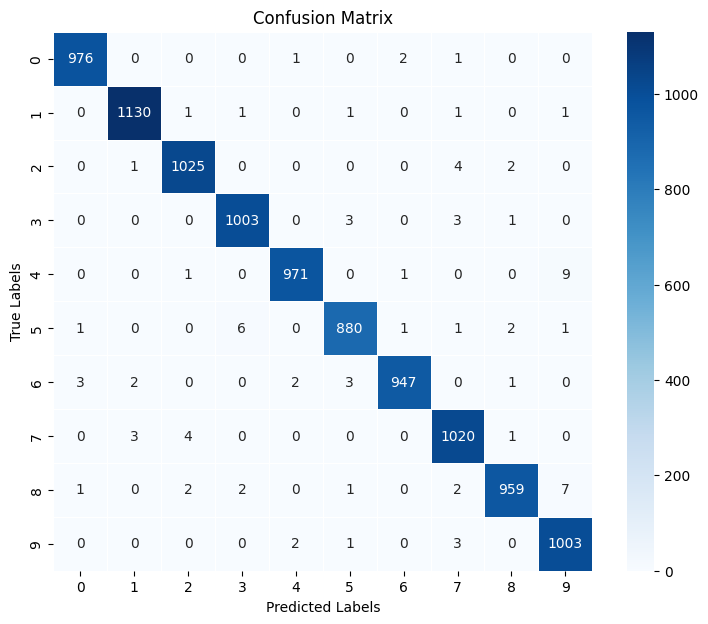

In [22]:
# Generate confusion matrix using sklearn
cm = confusion_matrix(y_test, predictions)

# Create the confusion matrix plot
plt.figure(figsize=(9, 7))
sn.heatmap(
    cm,
    annot=True,   # Annotate the heatmap with values
    fmt='d',      # Display the values as integers
    cmap='Blues', # Color map
    linewidths=0.5,
    square=True,  # Make the plot square
    xticklabels=np.arange(10),  # Adjust for your number of classes (10 for MNIST)
    yticklabels=np.arange(10)   # Adjust for your number of classes (10 for MNIST)
)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()